In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
io = r'F:\清华课程\大数据分析\HW1_all\data.xlsx'
data = pd.read_excel(io, sheet_name = 0)
data.head()

,群名,群类别,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000
2,**ˇ⒊無黒\噵丶⒈群,1,73,4,0.024163,0.750000,23.415385,4.699893,0.287879,0.500000,4,1.000000,0.000000,0.250000
3,**海网管工作联系基地,1,91,14,0.006105,0.901639,29.409091,2.854965,0.340426,0.142857,7,1.000000,0.250000,0.000000
4,tbsgame.net/bbs,1,133,2112,0.011107,0.961832,30.319672,4.669866,0.110236,0.167140,327,0.532110,0.104640,0.037879


In [3]:
D = data[data['群类别'] <= 2]
D.head()

,群名,群类别,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000
2,**ˇ⒊無黒\噵丶⒈群,1,73,4,0.024163,0.750000,23.415385,4.699893,0.287879,0.500000,4,1.000000,0.000000,0.250000
3,**海网管工作联系基地,1,91,14,0.006105,0.901639,29.409091,2.854965,0.340426,0.142857,7,1.000000,0.250000,0.000000
4,tbsgame.net/bbs,1,133,2112,0.011107,0.961832,30.319672,4.669866,0.110236,0.167140,327,0.532110,0.104640,0.037879


In [4]:
X_train = D.drop(['群名','群类别'], axis=1)
Y_train = D['群类别']
Y_train = Y_train-1
Y_train

0      0
1      0
2      0
3      0
4      0
      ..
779    1
780    1
781    1
782    1
783    1
Name: 群类别, Length: 784, dtype: int64

In [5]:
X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_train.head()

,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,0.006157,0.000900,0.084357,0.876307,0.436138,0.452826,0.157754,0.088889,0.019180,0.434783,0.085714,0.069841
1,0.011288,0.000003,0.016360,0.558111,0.462407,0.652962,0.357609,0.000000,0.000872,1.000000,1.000000,0.000000
2,0.011288,0.000009,0.039149,0.737152,0.331264,0.322890,0.228853,0.500000,0.002616,1.000000,0.000000,0.250000
3,0.020523,0.000037,0.009520,0.896584,0.523702,0.182662,0.285755,0.142857,0.005231,1.000000,0.250000,0.000000
4,0.042073,0.006050,0.017728,0.959871,0.552938,0.320608,0.036486,0.167140,0.284220,0.532110,0.104640,0.037879


In [6]:
logreg = LogisticRegression(penalty = 'l2', dual=False,
                            C =1.0, fit_intercept=True, intercept_scaling=1,
                            class_weight='balanced', random_state=None, solver='sag',
                            max_iter=1000, multi_class='ovr', verbose=0,
                            warm_start=False, n_jobs=None, l1_ratio=None)
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

77.68

In [7]:
logreg.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

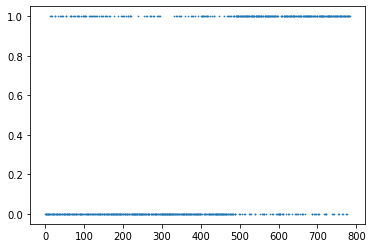

In [8]:
# plt.scatter(range(784), Y_train,s=1)
y_pred = logreg.predict(X_train)
plt.scatter(range(784),y_pred,s = 0.5)
plt.show()

In [9]:
C = logreg.coef_
C

array([[ 2.39032493, -0.45342278,  0.6650011 , -1.13689839,  4.54765875,
         1.15602508,  0.55098149, -0.40012255,  0.38380432,  1.02525382,
        -1.31236234, -0.40718445]])

In [10]:
B = logreg.intercept_
B

array([-2.48819993])

In [11]:
C.shape, X_train.shape
A = np.matmul(C, np.transpose(np.array(X_train))) + B
A
R = 1/(1 + np.exp(-A))
R

array([[0.36734391, 0.42143586, 0.36748561, 0.48502503, 0.46765808,
        0.3994621 , 0.16839399, 0.37254749, 0.29622634, 0.37734043,
        0.21039708, 0.45510147, 0.40181293, 0.64493356, 0.41311179,
        0.77677157, 0.52690107, 0.43427781, 0.3398294 , 0.3780902 ,
        0.48812478, 0.17941415, 0.45897223, 0.39743295, 0.54187284,
        0.63136198, 0.11515174, 0.32137387, 0.27168097, 0.37275573,
        0.37532029, 0.25541174, 0.77313709, 0.37030782, 0.37963379,
        0.32888527, 0.30366272, 0.7262748 , 0.29563772, 0.32648734,
        0.45509716, 0.54143843, 0.60991609, 0.17539303, 0.48954767,
        0.14806709, 0.75184987, 0.24644889, 0.13875321, 0.26166034,
        0.27073941, 0.43267221, 0.71511968, 0.33746312, 0.6678011 ,
        0.44935264, 0.35331466, 0.37617721, 0.41403249, 0.28560167,
        0.3597383 , 0.42250152, 0.24859379, 0.44235032, 0.54163209,
        0.60317799, 0.2894299 , 0.65070837, 0.42036759, 0.49631088,
        0.49870154, 0.37298498, 0.52000944, 0.47

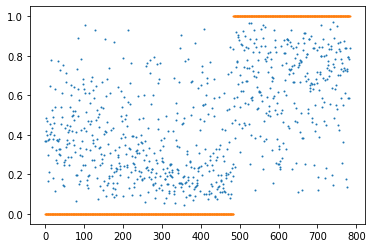

In [12]:
plt.scatter(range(784),R, s=1)
plt.scatter(range(784), Y_train, s=1)
plt.show()

In [64]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's